In [204]:
import csv
import datetime
import io
import pandas
import plotly.graph_objects
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib notebook
from scipy import stats
# from pandas.tseries.offsets import *
from statsmodels.tsa import stattools
import numpy as np

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import plotly.express as px
import plotly.graph_objects as go

import loguru
import requests

In [344]:
# filenameTaiexs = f'taiexs-2014-2020.csv'
filenameTaiexs = f'taiexs-2019.csv'
filepathTaiexs = f'/Users/singularity/Aaron/coding/fintech/{filenameTaiexs}'

dfTaiexs = pandas.read_csv(filepathTaiexs)
dfTaiexs['Date'] = pandas.to_datetime(dfTaiexs['Date'], format='%Y%m%d')

dfTaiexs.index = dfTaiexs['Date']
dfTaiexs

,Date,OpenPrice,HighestPrice,LowestPrice,ClosePrice
Date,,,,,
2018-01-02,2018-01-02,10664.82,10710.73,10650.77,10710.73
2018-01-03,2018-01-03,10759.61,10813.16,10759.61,10801.57
2018-01-04,2018-01-04,10834.58,10853.46,10794.25,10848.63
2018-01-05,2018-01-05,10856.92,10879.80,10815.68,10879.80
2018-01-08,2018-01-08,10899.09,10918.47,10869.12,10915.75
...,...,...,...,...,...
2020-06-18,2020-06-18,11534.20,11567.42,11485.39,11548.33
2020-06-19,2020-06-19,11557.27,11584.88,11542.37,11549.86
2020-06-22,2020-06-22,11553.91,11632.88,11553.91,11572.93


In [345]:
close = dfTaiexs['ClosePrice']
taiexRet = (close-close.shift(1))/close
taiexDiff = (close-close.shift(1))
taiexLogDiff = np.log(close/close.shift(1)).dropna()
taiexRet.head()

Date
2018-01-02         NaN
2018-01-03    0.008410
2018-01-04    0.004338
2018-01-05    0.002865
2018-01-08    0.003293
Name: ClosePrice, dtype: float64

In [346]:
taiexRet = taiexRet.dropna()
taiexDiff = taiexDiff.dropna()

In [347]:
acfs = stattools.acf(taiexRet)
acfs[:13]

array([ 1.        , -0.02436281,  0.15690578,  0.04986005,  0.01101681,
       -0.0056262 , -0.00827054, -0.01747184,  0.03534648, -0.05603985,
        0.00204425,  0.03617438, -0.0464063 ])

In [348]:
pacfs = stattools.pacf(taiexRet)
pacfs[:13]

array([ 1.        , -0.02440334,  0.15692673,  0.05865677, -0.01120054,
       -0.02349203, -0.01248708, -0.01417873,  0.04107488, -0.04977361,
       -0.01175906,  0.05062702, -0.03954237])

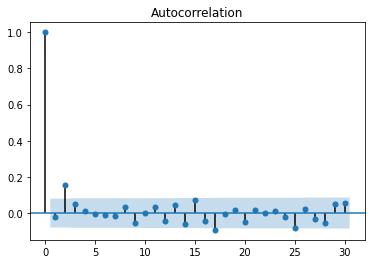

In [349]:
from statsmodels.graphics.tsaplots import *
_ = plot_acf(taiexRet, use_vlines=True, lags=30)

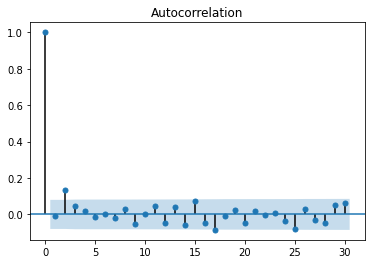

In [350]:
_ = plot_acf(taiexDiff, use_vlines=True, lags=30)

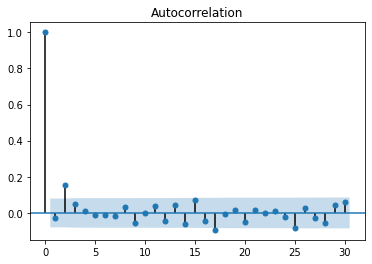

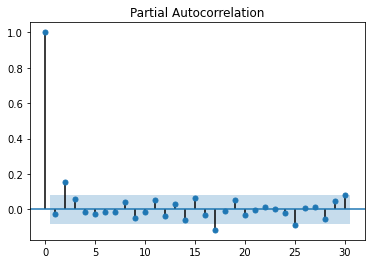

In [351]:
_ = plot_acf(taiexLogDiff, use_vlines=True, lags=30)
_ = plot_pacf(taiexLogDiff, use_vlines=True, lags=30)

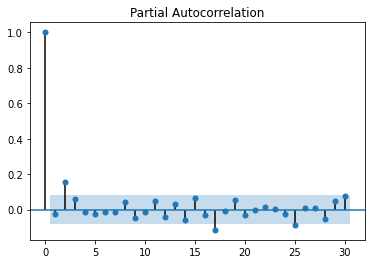

In [352]:
_ = plot_pacf(taiexRet, use_vlines=True, lags=30)

Text(0.5, 1.0, '加權股價指數收盤指數時序圖 ')

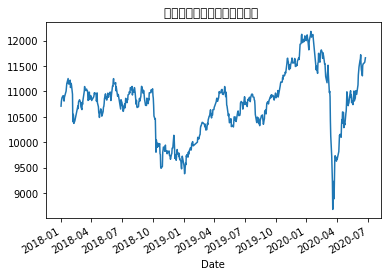

In [353]:
close.plot()
plt.title('加權股價指數收盤指數時序圖 ')

Text(0.5, 1.0, '加權股價指數收益率指數時序圖')

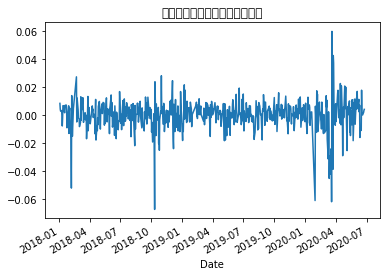

In [354]:
taiexRet.plot()
plt.title('加權股價指數收益率指數時序圖')

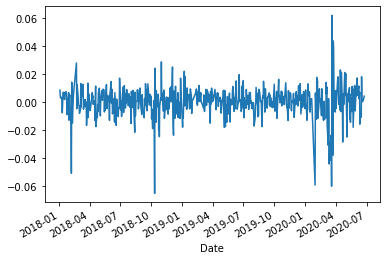

In [355]:
taiexLogDiff.plot()

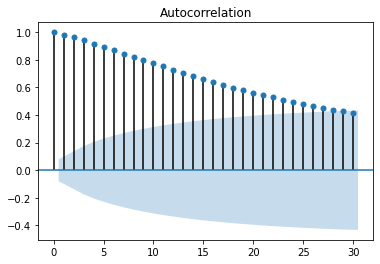

In [356]:
_ = plot_acf(close,use_vlines=True,lags=30)

Text(0.5, 1.0, '加權股價指數變動時序圖')

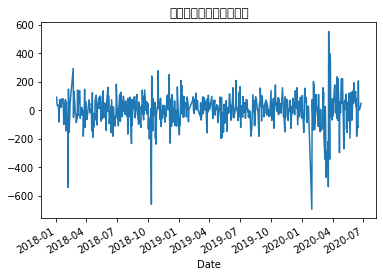

In [357]:
taiexDiff.plot()
plt.title('加權股價指數變動時序圖')

In [358]:
from arch.unitroot import ADF

print(f'adf_taiexRet\n')
adf_taiexRet=ADF(taiexRet)
print(adf_taiexRet.summary().as_text())
print(f'*---------------------\n')

print(f'adf_taiexDiff\n')
adf_taiexDiff=ADF(taiexDiff)
print(adf_taiexDiff.summary().as_text())
print(f'*---------------------\n')

print(f'adf_taiexLogDiff\n')
adf_taiexLogDiff=ADF(taiexLogDiff)
print(adf_taiexLogDiff.summary().as_text())
print(f'*---------------------\n')

print(f'adfclose\n')
adfclose=ADF(close)
print(adfclose.summary().as_text())



adf_taiexRet

   Augmented Dickey-Fuller Results   
Test Statistic                -12.006
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
*---------------------

adf_taiexDiff

   Augmented Dickey-Fuller Results   
Test Statistic                -15.155
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
*---------------------

adf_taiexLogDiff

   Augmented Dickey-Fuller Results   
Test Statistic                -12.063
P-value                         0.000
Lags                                2
---------------

## White Noise Test

In [359]:
LjungBox1=stattools.q_stat(stattools.acf(taiexRet)[1:13],len(taiexRet))
LjungBox1[1][-1]
# 非白雜訊

0.03826039498212705

In [360]:
LjungBox1=stattools.q_stat(stattools.acf(taiexLogDiff)[1:13],len(taiexRet))
LjungBox1[1][-1]
# 非白雜訊

0.044033164284664784

In [361]:
LjungBox1=stattools.q_stat(stattools.acf(taiexDiff)[1:20],len(taiexRet))
LjungBox1[1][-1]


0.038895225595978786

In [362]:
LjungBox2=stattools.q_stat(stattools.acf(close)[1:13],len(taiexRet))
LjungBox2[1][-1]

0.0

## Time Series

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from arch import arch_model

In [ ]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [ ]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pandas.Series):
        y = pandas.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

In [ ]:
# y = taiexRet
# y = taiexDiff
y = taiexLogDiff
# y = close

In [ ]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

# Notice I've selected a specific time period to run this analysis
# TS = lrets['^GSPC'].dropna()
TS = y
TS.index = pandas.DatetimeIndex(TS.index.values,
                               freq=TS.index.inferred_freq)
res_tup = _get_best_model(TS)

In [ ]:
order = res_tup[1]
model = res_tup[2]

In [ ]:
tsplot(model.resid, lags=30)

In [ ]:
tsplot(model.resid**2, lags=30)

In [ ]:

# Now we can fit the arch model using the best fit arima model parameters

# p_ = 1
# o_ = 0
# q_ = 1
p_ = order[0]
o_ = order[1]
q_ = order[2]

# Using student T distribution usually provides better fit
# am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
am = arch_model(TS, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

In [ ]:
tsplot(res.resid, lags=30)

In [ ]:
tsplot(res.resid**2, lags=30)